# DATA PREPROCESSING
Importing Libraries required

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading the file
In the below line, the file named as fifa21_raw_data.csv, is being read by using read_csv function of python library.
we got this dataset from Kaggle.

In [111]:
data = pd.read_csv("fifa21_raw_data.csv")

C:\Users\divyakuwarbi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (76) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# The glimpse of dataset
Here we have 77 distinct columns and 18979 rows in the dataset. Some of the features need preprocessing so that our data would look clean. 

In [112]:
data.head()

,photoUrl,LongName,playerUrl,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,https://cdn.sofifa.com/players/158/023/21_60.png,Lionel Messi,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,RW ST CF,L. Messi,33,93,93,\n\n\n\nFC Barcelona\n2004 ~ 2021\n\n,...,Medium,Low,5 ★,85,92,91,95,38,65,\n372
1,https://cdn.sofifa.com/players/020/801/21_60.png,C. Ronaldo dos Santos Aveiro,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,ST LW,Cristiano Ronaldo,35,92,92,\n\n\n\nJuventus\n2018 ~ 2022\n\n,...,High,Low,5 ★,89,93,81,89,35,77,\n344
2,https://cdn.sofifa.com/players/200/389/21_60.png,Jan Oblak,http://sofifa.com/player/200389/jan-oblak/210005/,Slovenia,GK,J. Oblak,27,91,93,\n\n\n\nAtlético Madrid\n2014 ~ 2023\n\n,...,Medium,Medium,3 ★,87,92,78,90,52,90,\n86
3,https://cdn.sofifa.com/players/192/985/21_60.png,Kevin De Bruyne,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,CAM CM,K. De Bruyne,29,91,91,\n\n\n\nManchester City\n2015 ~ 2023\n\n,...,High,High,4 ★,76,86,93,88,64,78,\n163
4,https://cdn.sofifa.com/players/190/871/21_60.png,Neymar da Silva Santos Jr.,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,LW CAM,Neymar Jr,28,91,91,\n\n\n\nParis Saint-Germain\n2017 ~ 2022\n\n,...,High,Medium,5 ★,91,85,86,94,36,59,\n273


In [113]:
data.shape

(18979, 77)

In [114]:
data.columns

Index(['photoUrl', 'LongName', 'playerUrl', 'Nationality', 'Positions', 'Name',
       'Age', '↓OVA', 'POT', 'Team & Contract', 'ID', 'Height', 'Weight',
       'foot', 'BOV', 'BP', 'Growth', 'Joined', 'Loan Date End', 'Value',
       'Wage', 'Release Clause', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 'PHY', 'Hits

In [115]:
data['Positions']

0        RW ST CF
1           ST LW
2              GK
3          CAM CM
4          LW CAM
           ...   
18974          CB
18975          ST
18976          CB
18977          CM
18978         CDM
Name: Positions, Length: 18979, dtype: object

# Data cleaning
Here, the column Team & Contract have name of the team as well as the starting and ending date of contract as values but we need only the name of team. So we will remove the unnecessary data and will create a new column named as "Club", having only the name of club to which the players belong. 

In [116]:
data1 = data["Team & Contract"]
data1.head()

0           \n\n\n\nFC Barcelona\n2004 ~ 2021\n\n
1               \n\n\n\nJuventus\n2018 ~ 2022\n\n
2        \n\n\n\nAtlético Madrid\n2014 ~ 2023\n\n
3        \n\n\n\nManchester City\n2015 ~ 2023\n\n
4    \n\n\n\nParis Saint-Germain\n2017 ~ 2022\n\n
Name: Team & Contract, dtype: object

In [117]:
data['club'] = data['Team & Contract'].str.rstrip('\n')
data['Club'] = data['club'].str.lstrip('\n')
data['Club'] = data['Club'].str.replace('\d+','')
data['Club'] = data['Club'].str.strip('\n ~')

In [118]:
data['Club']

0                               FC Barcelona
1                                   Juventus
2                            Atlético Madrid
3                            Manchester City
4                        Paris Saint-Germain
                        ...                 
18974    Chongqing Dangdai Lifan FC SWM Team
18975                        Oldham Athletic
18976                             Wuhan Zall
18977                        Oldham Athletic
18978                           Club Bolívar
Name: Club, Length: 18979, dtype: object

# Data Transformation
In the fifa dataset, the column height has values in feet and inches.To make it convinient we have converted the height of players in cm.

In [119]:
data['Height']
data['temp1'] = data.Height.str.get(0)
data['temp1']

0        5
1        6
2        6
3        5
4        5
        ..
18974    5
18975    5
18976    5
18977    5
18978    5
Name: temp1, Length: 18979, dtype: object

In [120]:
data['temp1'] = data['temp1'].astype(float)
data['temp1'] = data.temp1 * 30.48

In [121]:
data['temp1']

0        152.40
1        182.88
2        182.88
3        152.40
4        152.40
          ...  
18974    152.40
18975    152.40
18976    152.40
18977    152.40
18978    152.40
Name: temp1, Length: 18979, dtype: float64

In [122]:
data['temp2'] = data.Height.str.get(2) + data.Height.str.get(3)
data['temp2']

0        7"
1        2"
2        2"
3        11
4        9"
         ..
18974    10
18975    7"
18976    10
18977    9"
18978    9"
Name: temp2, Length: 18979, dtype: object

In [123]:
data['temp2'] = data['temp2'].str.strip('"')

In [124]:
data['temp2']

0         7
1         2
2         2
3        11
4         9
         ..
18974    10
18975     7
18976    10
18977     9
18978     9
Name: temp2, Length: 18979, dtype: object

In [125]:
data['temp2'] = data.temp2.astype(float)
data['temp2'] = data.temp2 * 2.54
data['temp2']

0        17.78
1         5.08
2         5.08
3        27.94
4        22.86
         ...  
18974    25.40
18975    17.78
18976    25.40
18977    22.86
18978    22.86
Name: temp2, Length: 18979, dtype: float64

In [126]:
total = data['temp1'] + data['temp2']

In [127]:
print(total)

0        170.18
1        187.96
2        187.96
3        180.34
4        175.26
          ...  
18974    177.80
18975    170.18
18976    177.80
18977    175.26
18978    175.26
Length: 18979, dtype: float64


In [128]:
data['Height in cm'] = total

In [129]:
data['Height in cm']

0        170.18
1        187.96
2        187.96
3        180.34
4        175.26
          ...  
18974    177.80
18975    170.18
18976    177.80
18977    175.26
18978    175.26
Name: Height in cm, Length: 18979, dtype: float64

In [130]:
data.head()

,photoUrl,LongName,playerUrl,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,...,PAS,DRI,DEF,PHY,Hits,club,Club,temp1,temp2,Height in cm
0,https://cdn.sofifa.com/players/158/023/21_60.png,Lionel Messi,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,RW ST CF,L. Messi,33,93,93,\n\n\n\nFC Barcelona\n2004 ~ 2021\n\n,...,91,95,38,65,\n372,\n\n\n\nFC Barcelona\n2004 ~ 2021,FC Barcelona,152.40,17.78,170.18
1,https://cdn.sofifa.com/players/020/801/21_60.png,C. Ronaldo dos Santos Aveiro,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,ST LW,Cristiano Ronaldo,35,92,92,\n\n\n\nJuventus\n2018 ~ 2022\n\n,...,81,89,35,77,\n344,\n\n\n\nJuventus\n2018 ~ 2022,Juventus,182.88,5.08,187.96
2,https://cdn.sofifa.com/players/200/389/21_60.png,Jan Oblak,http://sofifa.com/player/200389/jan-oblak/210005/,Slovenia,GK,J. Oblak,27,91,93,\n\n\n\nAtlético Madrid\n2014 ~ 2023\n\n,...,78,90,52,90,\n86,\n\n\n\nAtlético Madrid\n2014 ~ 2023,Atlético Madrid,182.88,5.08,187.96
3,https://cdn.sofifa.com/players/192/985/21_60.png,Kevin De Bruyne,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,CAM CM,K. De Bruyne,29,91,91,\n\n\n\nManchester City\n2015 ~ 2023\n\n,...,93,88,64,78,\n163,\n\n\n\nManchester City\n2015 ~ 2023,Manchester City,152.40,27.94,180.34
4,https://cdn.sofifa.com/players/190/871/21_60.png,Neymar da Silva Santos Jr.,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,LW CAM,Neymar Jr,28,91,91,\n\n\n\nParis Saint-Germain\n2017 ~ 2022\n\n,...,86,94,36,59,\n273,\n\n\n\nParis Saint-Germain\n2017 ~ 2022,Paris Saint-Germain,152.40,22.86,175.26


In [131]:
data['Prefered Positions'] = data.Positions.str.split().str.get(0)
player_position = {"Gkkk":"GK",
                   "LWB":"DEF","LB":"DEF","CB":"DEF","RB":"DEF","RWB":"DEF",
                   "LW":"MID","LM":"MID","CDM":"MID","CM":"MID","CAM":"MID","RW":"MID","RW":"MID",
                   "CF":"FWD","ST":"FWD"
                  } 
data['Position'] = data["Prefered Positions"].replace(player_position, regex=True)

In [132]:
data['Position']

0        MID
1        FWD
2         GK
3        MID
4        MID
        ... 
18974    DEF
18975    FWD
18976    DEF
18977    MID
18978    MID
Name: Position, Length: 18979, dtype: object

In [133]:
data['Prefered Positions']

0         RW
1         ST
2         GK
3        CAM
4         LW
        ... 
18974     CB
18975     ST
18976     CB
18977     CM
18978    CDM
Name: Prefered Positions, Length: 18979, dtype: object

In [134]:
data = data.rename(columns = {"↓OVA" :"Overall"})

# Removing redundant and unwanted features

In [135]:
data1 = pd.DataFrame(data)

In [136]:
data1.pop('temp1')

0        152.40
1        182.88
2        182.88
3        152.40
4        152.40
          ...  
18974    152.40
18975    152.40
18976    152.40
18977    152.40
18978    152.40
Name: temp1, Length: 18979, dtype: float64

In [137]:
data1.head()

,photoUrl,LongName,playerUrl,Nationality,Positions,Name,Age,Overall,POT,Team & Contract,...,DRI,DEF,PHY,Hits,club,Club,temp2,Height in cm,Prefered Positions,Position
0,https://cdn.sofifa.com/players/158/023/21_60.png,Lionel Messi,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,RW ST CF,L. Messi,33,93,93,\n\n\n\nFC Barcelona\n2004 ~ 2021\n\n,...,95,38,65,\n372,\n\n\n\nFC Barcelona\n2004 ~ 2021,FC Barcelona,17.78,170.18,RW,MID
1,https://cdn.sofifa.com/players/020/801/21_60.png,C. Ronaldo dos Santos Aveiro,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,ST LW,Cristiano Ronaldo,35,92,92,\n\n\n\nJuventus\n2018 ~ 2022\n\n,...,89,35,77,\n344,\n\n\n\nJuventus\n2018 ~ 2022,Juventus,5.08,187.96,ST,FWD
2,https://cdn.sofifa.com/players/200/389/21_60.png,Jan Oblak,http://sofifa.com/player/200389/jan-oblak/210005/,Slovenia,GK,J. Oblak,27,91,93,\n\n\n\nAtlético Madrid\n2014 ~ 2023\n\n,...,90,52,90,\n86,\n\n\n\nAtlético Madrid\n2014 ~ 2023,Atlético Madrid,5.08,187.96,GK,GK
3,https://cdn.sofifa.com/players/192/985/21_60.png,Kevin De Bruyne,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,CAM CM,K. De Bruyne,29,91,91,\n\n\n\nManchester City\n2015 ~ 2023\n\n,...,88,64,78,\n163,\n\n\n\nManchester City\n2015 ~ 2023,Manchester City,27.94,180.34,CAM,MID
4,https://cdn.sofifa.com/players/190/871/21_60.png,Neymar da Silva Santos Jr.,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,LW CAM,Neymar Jr,28,91,91,\n\n\n\nParis Saint-Germain\n2017 ~ 2022\n\n,...,94,36,59,\n273,\n\n\n\nParis Saint-Germain\n2017 ~ 2022,Paris Saint-Germain,22.86,175.26,LW,MID


In [138]:
data1.pop('temp2')

0        17.78
1         5.08
2         5.08
3        27.94
4        22.86
         ...  
18974    25.40
18975    17.78
18976    25.40
18977    22.86
18978    22.86
Name: temp2, Length: 18979, dtype: float64

In [139]:
data1.pop('Team & Contract')

0                    \n\n\n\nFC Barcelona\n2004 ~ 2021\n\n
1                        \n\n\n\nJuventus\n2018 ~ 2022\n\n
2                 \n\n\n\nAtlético Madrid\n2014 ~ 2023\n\n
3                 \n\n\n\nManchester City\n2015 ~ 2023\n\n
4             \n\n\n\nParis Saint-Germain\n2017 ~ 2022\n\n
                               ...                        
18974    \n\n\n\nChongqing Dangdai Lifan FC SWM Team\n2...
18975             \n\n\n\nOldham Athletic\n2020 ~ 2021\n\n
18976                  \n\n\n\nWuhan Zall\n2018 ~ 2022\n\n
18977             \n\n\n\nOldham Athletic\n2020 ~ 2021\n\n
18978                \n\n\n\nClub Bolívar\n2020 ~ 2024\n\n
Name: Team & Contract, Length: 18979, dtype: object

In [140]:
data1.pop('club')

0                        \n\n\n\nFC Barcelona\n2004 ~ 2021
1                            \n\n\n\nJuventus\n2018 ~ 2022
2                     \n\n\n\nAtlético Madrid\n2014 ~ 2023
3                     \n\n\n\nManchester City\n2015 ~ 2023
4                 \n\n\n\nParis Saint-Germain\n2017 ~ 2022
                               ...                        
18974    \n\n\n\nChongqing Dangdai Lifan FC SWM Team\n2...
18975                 \n\n\n\nOldham Athletic\n2020 ~ 2021
18976                      \n\n\n\nWuhan Zall\n2018 ~ 2022
18977                 \n\n\n\nOldham Athletic\n2020 ~ 2021
18978                    \n\n\n\nClub Bolívar\n2020 ~ 2024
Name: club, Length: 18979, dtype: object

In [141]:
data.head()

,photoUrl,LongName,playerUrl,Nationality,Positions,Name,Age,Overall,POT,ID,...,SHO,PAS,DRI,DEF,PHY,Hits,Club,Height in cm,Prefered Positions,Position
0,https://cdn.sofifa.com/players/158/023/21_60.png,Lionel Messi,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,RW ST CF,L. Messi,33,93,93,158023,...,92,91,95,38,65,\n372,FC Barcelona,170.18,RW,MID
1,https://cdn.sofifa.com/players/020/801/21_60.png,C. Ronaldo dos Santos Aveiro,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,ST LW,Cristiano Ronaldo,35,92,92,20801,...,93,81,89,35,77,\n344,Juventus,187.96,ST,FWD
2,https://cdn.sofifa.com/players/200/389/21_60.png,Jan Oblak,http://sofifa.com/player/200389/jan-oblak/210005/,Slovenia,GK,J. Oblak,27,91,93,200389,...,92,78,90,52,90,\n86,Atlético Madrid,187.96,GK,GK
3,https://cdn.sofifa.com/players/192/985/21_60.png,Kevin De Bruyne,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,CAM CM,K. De Bruyne,29,91,91,192985,...,86,93,88,64,78,\n163,Manchester City,180.34,CAM,MID
4,https://cdn.sofifa.com/players/190/871/21_60.png,Neymar da Silva Santos Jr.,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,LW CAM,Neymar Jr,28,91,91,190871,...,85,86,94,36,59,\n273,Paris Saint-Germain,175.26,LW,MID


In [142]:
data.isnull().sum()

photoUrl              0
LongName              0
playerUrl             0
Nationality           0
Positions             0
                     ..
Hits                  0
Club                  0
Height in cm          0
Prefered Positions    0
Position              0
Length: 80, dtype: int64

In [143]:
data2 = data[['ID','Name','Age','Nationality','↓OVA','Club','Value','Wage','Positions','Height in cm','Weight']]

KeyError: "['↓OVA'] not in index"

In [ ]:
data2.head()

# Checking for Missing Values in the dataset

In [144]:
data2.isnull().sum()

ID              0
Name            0
Age             0
Nationality     0
↓OVA            0
Club            0
Value           0
Wage            0
Positions       0
Height in cm    0
Weight          0
dtype: int64

# Scaling the Features

In [145]:
def Val_split(x):
    try:
        if 'M' in x :
            return float(x.split("M")[0][1:])
        elif 'K' in x :
            return float(x.split("K")[0][1:])/1000
    except :
        return 0
    
data['Value'] = data['Value'].apply(lambda x : Val_split(x))
data =data.rename(columns ={"Value": "Value in M"})


In [146]:
data['Value in M']

0        67.500
1        46.000
2        75.000
3        87.000
4        90.000
          ...  
18974     0.035
18975     0.060
18976     0.040
18977     0.060
18978     0.060
Name: Value in M, Length: 18979, dtype: float64

In [147]:
def Wage_split(x):
    try:
        if 'K' in x :
            return float(x.split("K")[0][1:])
        elif "" in x:
            return 0.5
    except :
        return 0
    
data["Wage in K"] =data["Wage"].apply(lambda x : Wage_split(x))

In [148]:
data["Wage in K"]

0        560.0
1        220.0
2        125.0
3        370.0
4        270.0
         ...  
18974      1.0
18975      0.5
18976      1.0
18977      0.5
18978      0.5
Name: Wage in K, Length: 18979, dtype: float64

# Data Visualization

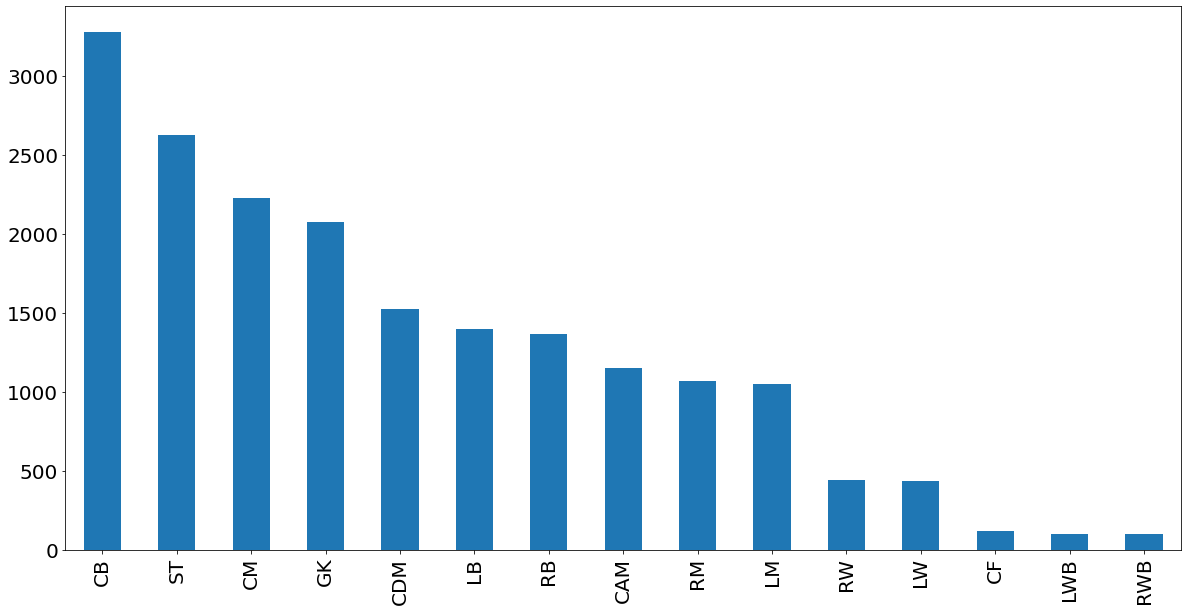

In [164]:
b1  = data['Prefered Positions'].value_counts().plot(kind ='bar', figsize = [20,10])

In [152]:
x = np.array(data['Prefered Positions'].unique())
y = np.array(data['Prefered Positions'].value_counts())


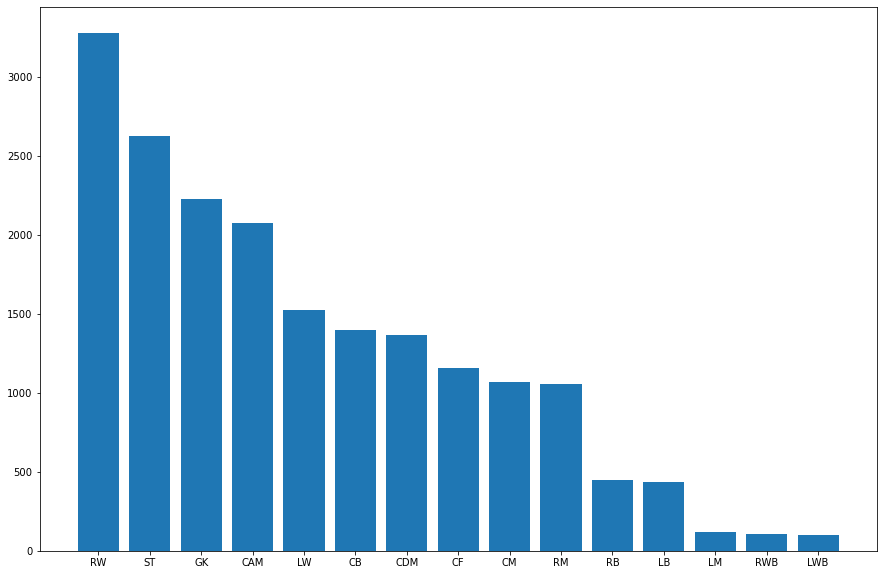

In [153]:

plt.figure(figsize = (15,10))
plt.bar(x,y)
plt.show()


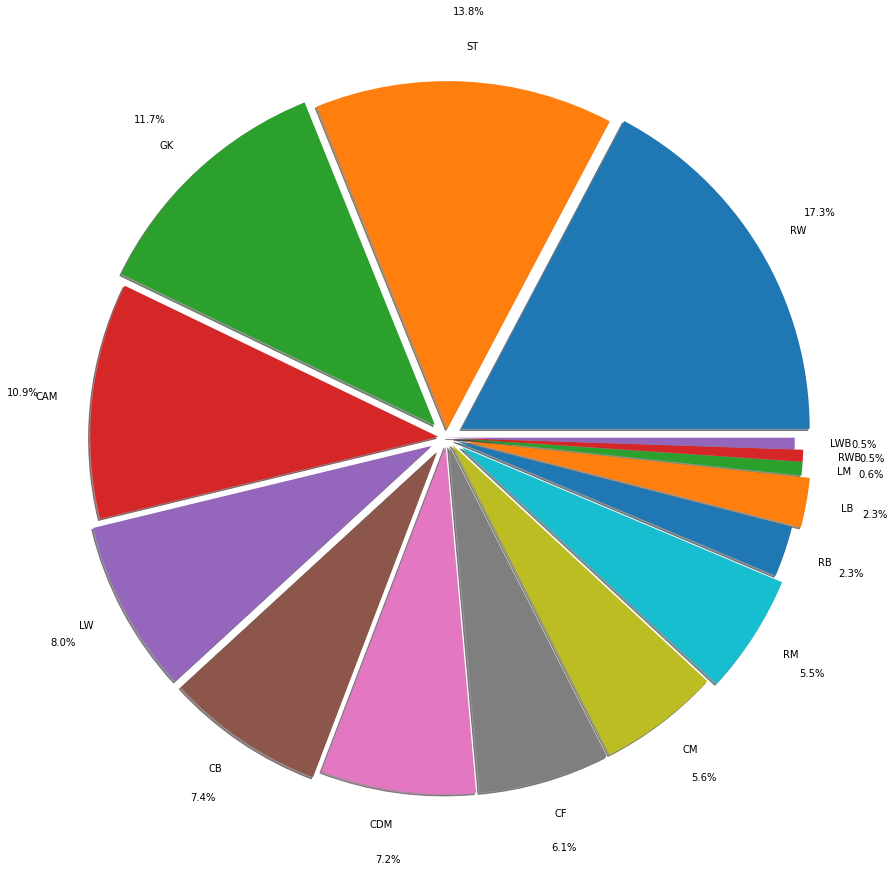

In [155]:
explode1 = (0.2,0.1,0.2,0.1,0.2,0.2,0.1,0.1,0.1,0.2,0.1,0.2,0.1,0.1,0.0)
plt.pie(y,labels = x,radius = 4.0, autopct = '%0.01f%%',shadow = True, pctdistance = 1.20,explode = explode1)
plt.show()

<AxesSubplot:ylabel='Nationality'>

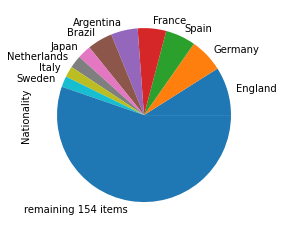

In [156]:
plt.rc('font',size = 10)
temp = data.Nationality.value_counts()
temp2 = temp.head(10)
if len(temp)>10:
    temp2['remaining {0} items'.format(len(temp) - 10)] = sum(temp[10:])
temp2.plot(kind='pie')


        

In [158]:
data['foot']
x1 = data['foot'].unique()
x1

array(['Left', 'Right'], dtype=object)

In [159]:
y1 = np.array(data['foot'].value_counts())
y1

array([14445,  4534], dtype=int64)

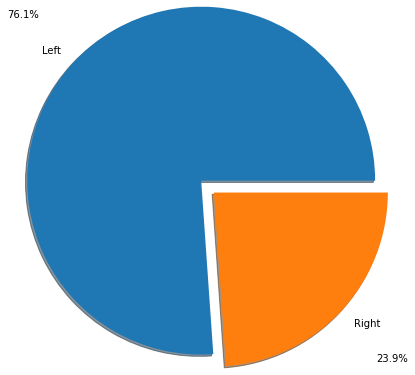

In [160]:
plt.pie(y1,labels = x1,radius = 2.0, autopct = '%0.01f%%',shadow = True, pctdistance = 1.40,explode = (0.2, 0.0))
plt.show()

In [161]:
data['Club']
x3 = data['Club'].unique()
y3 = np.array(data['Club'].value_counts())

0                               FC Barcelona
1                                   Juventus
2                            Atlético Madrid
3                            Manchester City
4                        Paris Saint-Germain
                        ...                 
18974    Chongqing Dangdai Lifan FC SWM Team
18975                        Oldham Athletic
18976                             Wuhan Zall
18977                        Oldham Athletic
18978                           Club Bolívar
Name: Club, Length: 18979, dtype: object

Text(0.5, 1.0, 'Top 10 Club')

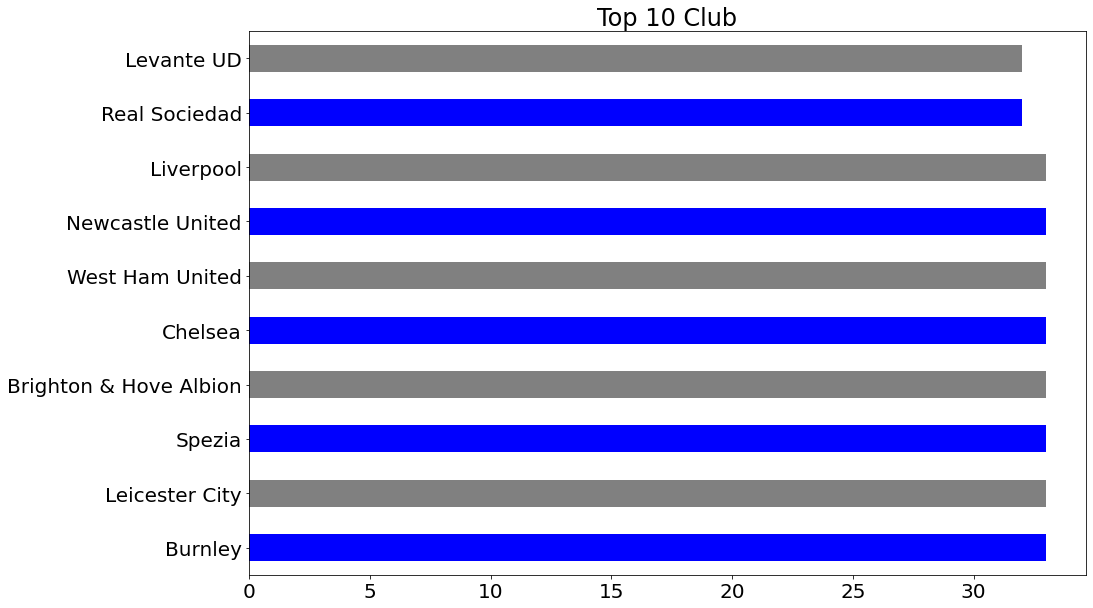

In [162]:
plt.rc('font', size=20) 
color = ('blue','grey')
top_10 = data['Club'].value_counts()[:10]
top_10.plot(kind='barh',color = color,figsize=(15,10))
plt.title('Top 10 Club')